In [3]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [4]:
img1 = cv2.imread('card.jpg', 0) # queryImage
img2 = cv2.imread('card_test.jpg', 0) # trainImage

In [5]:
# Initiate SIFT detector
#sift = cv2.SIFT()
sift = cv2.SIFT_create()
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

In [6]:
# create BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
# Match descriptors.
matches = bf.match(des1,des2)
# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)
# Draw first 10 matches.
img3 = cv2.drawMatches(img1,kp1,img2,kp2,matches[:10], flags=2)
plt.imshow(img3),plt.show()

error: OpenCV(4.5.3) /private/var/folders/24/8k48jl6d249_n_qfxwsl6xvm0000gn/T/pip-req-build-xxsyexfp/opencv/modules/core/src/batch_distance.cpp:282: error: (-215:Assertion failed) (type == CV_8U && dtype == CV_32S) || dtype == CV_32F in function 'batchDistance'


In [7]:
print(kp1[0])

<KeyPoint 0x7fc6b5ed4420>


In [8]:
# BFMatcher with default params
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1, des2, k=2)
# Apply ratio test
good = []

In [9]:
good = []
for m,n in matches:
    #print(m.distance, n.distance)
    if m.distance < 0.5*n.distance:
        good.append([m])

In [10]:
print(len(good))

120


In [11]:
# cv2.drawMatchesKnn expects list of lists as matches.
img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,good,None,flags=2)

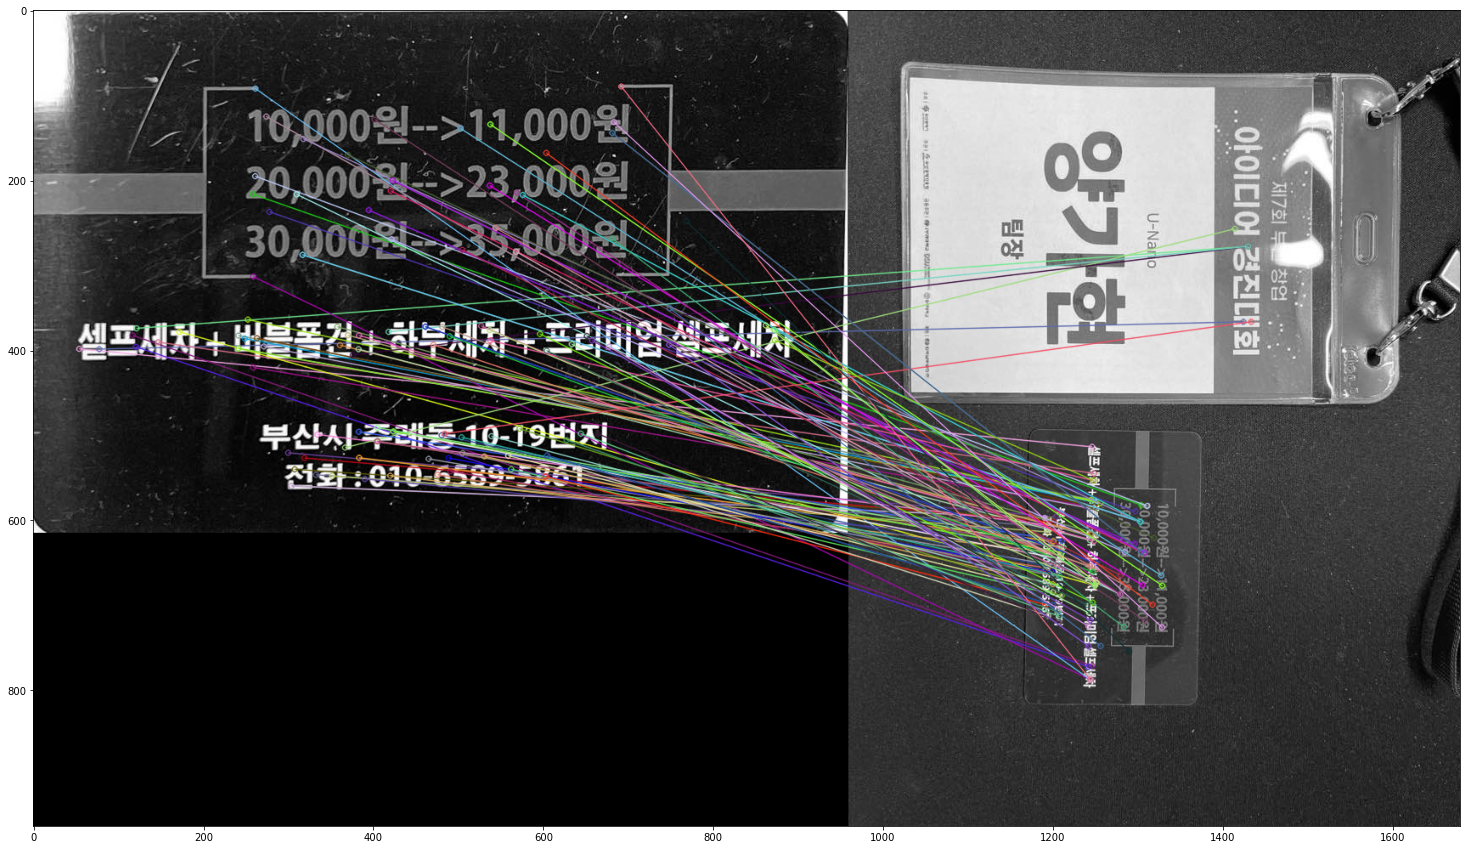

(<matplotlib.image.AxesImage at 0x7fc68d31edc0>, None)

In [12]:
plt.figure(figsize=(30,15))
plt.imshow(img3),plt.show()